In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
email = pd.read_csv(r"/Users/rahulpoojith/Downloads/emails.csv")

In [3]:
email.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
email.shape

(5172, 3002)

In [5]:
email.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [6]:
email.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
# Word Clouds
spam_words = ' '.join(email[email['Prediction'] == 1].drop(columns=['Email No.', 'Prediction']).sum().index)
non_spam_words = ' '.join(email[email['Prediction'] == 0].drop(columns=['Email No.', 'Prediction']).sum().index)

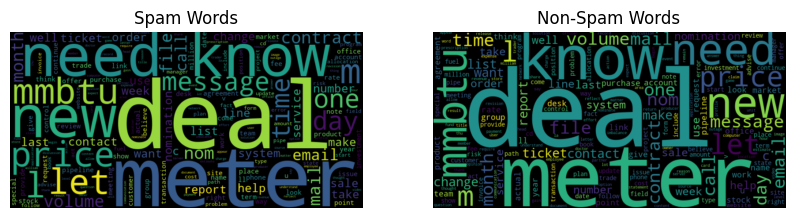

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=800, height=400).generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_non_spam = WordCloud(width=800, height=400).generate(non_spam_words)
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.title('Non-Spam Words')
plt.axis('off')

plt.show()

In [9]:
# Histograms/Bar Charts
selected_words = ['free', 'money', 'urgent']  # Choose some words to visualize
word_counts = email[selected_words + ['Prediction']]
word_counts_grouped = word_counts.groupby('Prediction').sum()

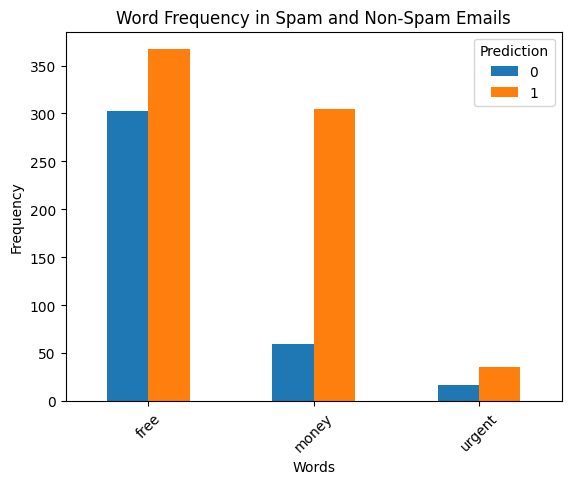

In [10]:
word_counts_grouped[selected_words].T.plot(kind='bar')
plt.title('Word Frequency in Spam and Non-Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Feature Importance Plot
X = email.drop(columns=['Email No.', 'Prediction'])
y = email['Prediction']

In [12]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

RandomForestClassifier()

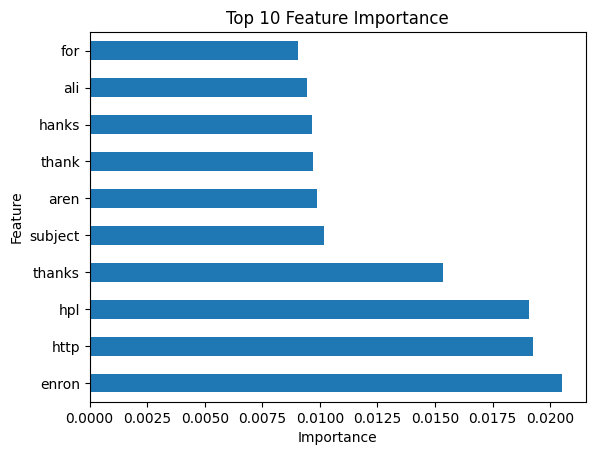

In [13]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [14]:
# PCA Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

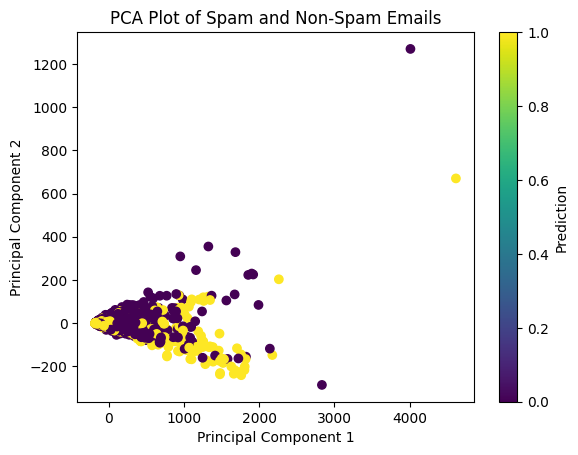

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Plot of Spam and Non-Spam Emails')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Prediction')
plt.show()

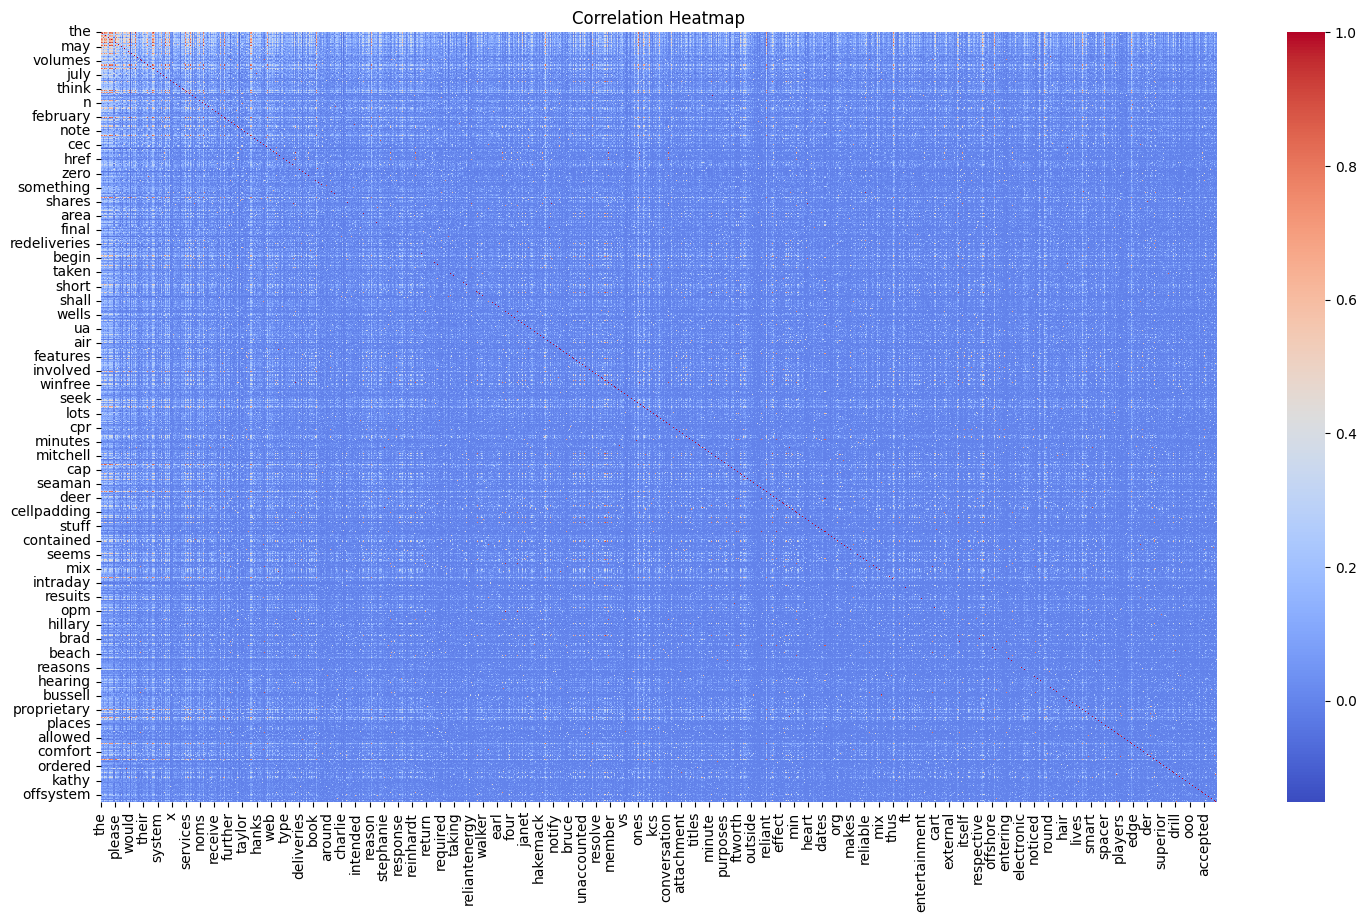

In [16]:
# Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(email.drop(columns=['Email No.', 'Prediction']).corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Cluster Analysis
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [18]:
email['Cluster'] = kmeans.labels_

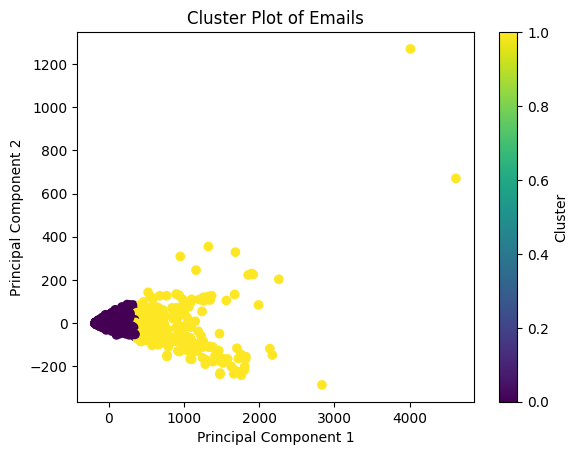

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=email['Cluster'], cmap='viridis')
plt.title('Cluster Plot of Emails')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [20]:
# ROC Curve
fpr, tpr, _ = roc_curve(y, rf_classifier.predict_proba(X)[:,1])
roc_auc = auc(fpr, tpr)

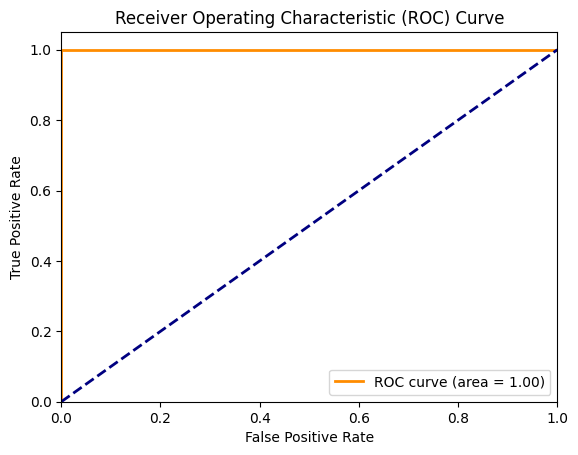

In [21]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Confusion Matrix
y_pred = rf_classifier.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

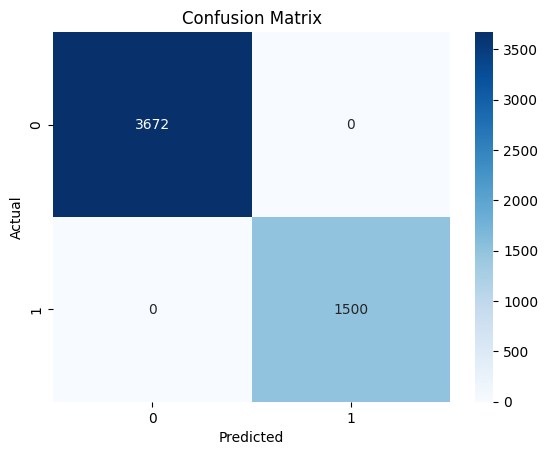

In [23]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
X = email.drop(columns=['Email No.', 'Prediction'])
y = email['Prediction']

In [25]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Choose a Classification Model
classifier = RandomForestClassifier()

In [27]:
# Train the Model
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Evaluate the Model
y_pred = classifier.predict(X_test)

In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9716494845360825


In [30]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.94      0.96      0.95       455

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552

